# Machine Learning Final Project

### Exploratory Data Analysis

Brea Beals, Julian Kleindiek, Mark Roberts
aka Tallbois


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import copy
from sklearn.preprocessing import StandardScaler

# 1. Data Import and Overview

In [5]:
#loading in dataframe
dat = pd.read_csv("/Users/markroberts/Desktop/Machine Learning/FinalProject/dat.csv", index_col = "Unnamed: 0")

In [4]:
# print info on dataframe
print("The dataset has {} rows and {} columns.".format(dat.shape[0], dat.shape[1]))
dat.head(5)

The dataset has 3777750 rows and 34 columns.


,event_id,latitude,longitude,date,STATE,EVENT_TYPE,TOR_F_SCALE,target,d,cc,...,TOR_LENGTH,TOR_WIDTH,BEGIN_LAT,BEGIN_LON,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS
0,0,24.74,-124.779999,2015-01-02,HAWAII,Heavy Rain,NaN,1,-0.000008,0.0,...,NaN,NaN,21.564633,-158.380733,0.0,0.0,0.0,0.0,0.0,0.0
1,1,24.74,-123.939999,2015-01-02,NaN,NaN,NaN,0,-0.000013,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2,24.74,-123.099999,2015-01-02,NaN,NaN,NaN,0,0.000003,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,3,24.74,-122.259999,2015-01-02,NaN,NaN,NaN,0,0.000005,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,4,24.74,-121.419999,2015-01-02,NaN,NaN,NaN,0,0.000002,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


### Feature description

According to the ERA5 data documentation, which can be found at https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation.


- **t**: Temperature - this parameter is the temperature in the atmosphere. It has units of kelvin (K). Temperature measured in kelvin can be converted to degrees Celsius (°C) by subtracting 273.15.
- **q**: Humidity - this parameter is the mass of water vapour per kilogram of moist air.
- **r**: Relative humidity - this parameter is the water vapour pressure as a percentage of the value at which the air becomes saturated (the point at which water vapour begins to condense into liquid water or deposition into ice).
- **o3**: Ozone mass mixing ratio - this parameter is the mass of ozone per kilogram of air.
- **w**: Vertical velocity - this parameter is the speed of air motion in the upward or downward direction.
- **u**: U component of wind - this parameter is the eastward component of the wind. It is the horizontal speed of air moving towards the east, in metres per second. A negative sign thus indicates air movement towards the west.
- **v**: V component of wind - This parameter is the northward component of the wind. It is the horizontal speed of air moving towards the north, in metres per second. A negative sign thus indicates air movement towards the south.
- **pv**: Potential vorticity - a measure of the capacity for air to rotate in the atmosphere.
- **vo**: Vorticity (relative) - this parameter is a measure of the rotation of air in the horizontal, around a vertical axis, relative to a fixed point on the surface of the Earth.
- **ciwc**: Specific cloud ice water content - this parameter is the mass of cloud ice particles per kilogram of the total mass of moist air. The 'total mass of moist air' is the sum of the dry air, water vapour, cloud liquid, cloud ice, rain and falling snow. This parameter represents the average value for a grid box.
- **clwc**: Specific cloud liquid water content - this parameter is the mass of cloud liquid water droplets per kilogram of the total mass of moist air. The 'total mass of moist air' is the sum of the dry air, water vapour, cloud liquid, cloud ice, rain and falling snow. This parameter represents the average value for a grid box.
- **crwc**: Specific rain water content - the mass of water produced from large-scale clouds that is of raindrop size and so can fall to the surface as precipitation.
- **cswc**: Specific snow water content - the mass of snow (aggregated ice crystals) produced from large-scale clouds that can fall to the surface as precipitation.
- **z**: Geopotential - this parameter is the gravitational potential energy of a unit mass, at a particular location, relative to mean sea level. It is also the amount of work that would have to be done, against the force of gravity, to lift a unit mass to that location from mean sea level.
- **cc**: Fraction of cloud cover - this parameter is the proportion of a grid box covered by cloud (liquid or ice). This parameter is available on multiple levels through the atmosphere.
- **d**: Divergence- this parameter is the horizontal divergence of velocity. It is the rate at which air is spreading out horizontally from a point, per square metre. This parameter is positive for air that is spreading out, or diverging, and negative for the opposite, for air that is concentrating, or converging (convergence).

# 2. Outlier detection & Elimination

In [8]:
# calculate errors
dat["err_lon"] = abs(dat["BEGIN_LON"] - dat["longitude"])
dat["err_lat"] = abs(dat["BEGIN_LAT"] - dat["latitude"])

In [11]:
dat["err_lon"].

<bound method Series.mean of 0          33.600735
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
3777745          NaN
3777746          NaN
3777747          NaN
3777748          NaN
3777749          NaN
Name: err_lon, Length: 3777750, dtype: float64>

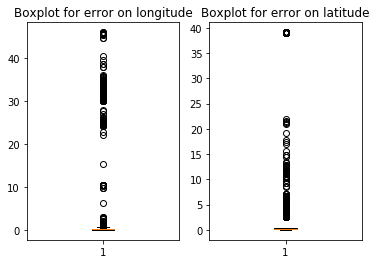

In [12]:
# investigating errors with boxplots

f, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(dat[dat["target"] == 1]["err_lon"])
ax1.set_title("Boxplot for error on longitude")
ax2.boxplot(dat[dat["target"] == 1]["err_lat"])
ax2.set_title("Boxplot for error on latitude")
plt.show()

In [ ]:
#investigating errors with distplots
f, (ax1, ax2) = plt.subplots(1,2)
sns.distplot(dat[dat["target"] == 1]["err_lon"], ax=ax1).set_title("Dist plot for error on longitude")
sns.distplot(dat[dat["target"] == 1]["err_lat"], ax=ax2 ).set_title("Dist plot for error on latitude")
plt.show()

In [13]:
# describe the errors for latitude and longitude
print(dat["err_lat"].describe())
print(dat["err_lon"].describe())

count    6.171900e+04
mean     2.670099e-01
std      1.040094e+00
min      2.288818e-07
25%      9.094643e-02
50%      1.899998e-01
75%      2.999998e-01
max      3.910290e+01
Name: err_lat, dtype: float64
count    61719.000000
mean         0.426573
std          2.788786
min          0.000001
25%          0.083201
50%          0.174901
75%          0.289999
max         46.125401
Name: err_lon, dtype: float64


In [19]:
# investigate outlier states
lon_outliers = dat[dat["err_lon"] > 1]
lat_outliers = dat[dat["err_lat"] > 1]

# print
print("The outliers for latitude are {}".format(lat_outliers["STATE"].unique()))
print("The outliers for longitude are {}".format(lon_outliers["STATE"].unique()))

The outliers for latitude are ['HAWAII' 'PUERTO RICO' 'VIRGIN ISLANDS' 'ALASKA' 'AMERICAN SAMOA']
The outliers for longitude are ['HAWAII' 'PUERTO RICO' 'VIRGIN ISLANDS' 'ALASKA' 'AMERICAN SAMOA']


- Outliers that are far away from mainland US need to be removed as we do not have accurate weather information on those remote locations.

In [21]:
# find outlier states outliers
outlier_states = lon_outliers["STATE"].unique()

# find non-outlier states
non_outlier_states = [i for i in dat["STATE"].unique() if i not in outlier_states]

# select non_outlier_states only
dat = copy.deepcopy(dat[dat["STATE"].isin(non_outlier_states)])

# reset index
dat.reset_index(inplace=True, drop=True)

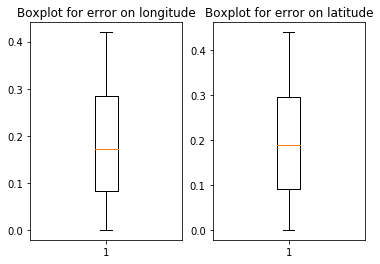

In [23]:
# investigate final boxplots with outlier states removed
f, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(dat[dat["target"] == 1]["err_lon"])
ax1.set_title("Boxplot for error on longitude")
ax2.boxplot(dat[dat["target"] == 1]["err_lat"])
ax2.set_title("Boxplot for error on latitude")
plt.show()

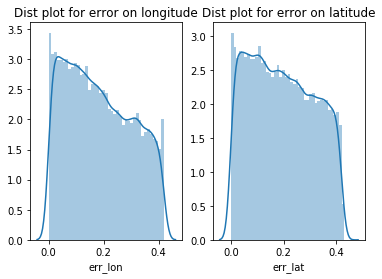

In [40]:
#investigating errors with distribution plots

f, (ax1, ax2) = plt.subplots(1,2)
sns.distplot(dat[dat["target"] == 1]["err_lon"], ax=ax1).set_title("Dist plot for error on longitude")
sns.distplot(dat[dat["target"] == 1]["err_lat"], ax=ax2 ).set_title("Dist plot for error on latitude")
plt.show()

In [41]:
# investigate the error from the grid enlargement (one degree in lat/lon is approx 69 miles)
print("The error for longitude is {:.2f} miles and for latitude {:.2f} miles.".format(dat["err_lon"].mean() * 69, dat["err_lat"].mean() * 69))

# shape of dataset
print("The dataset now has {} rows and {} columns.".format(dat.shape[0], dat.shape[1]))

# balance of dataset
print("There are {} severe weather events, representing {:.2f}% of the total dataset.".format(len(dat[dat["target"] == 1]), len(dat[dat["target"] == 1])/len(dat)*100))

The error for longitude is 12.79 miles and for latitude 13.45 miles.
The dataset now has 3777094 rows and 36 columns.
There are 61063 severe weather events, representing 1.62% of the total dataset.


# 3. Exploration of Severe Weather Type and Impact

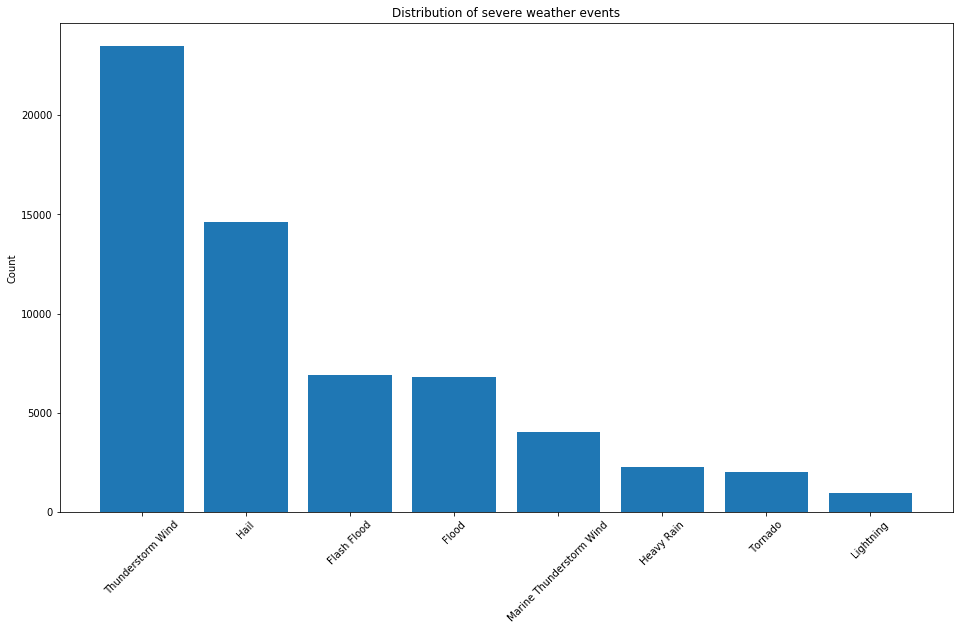

In [148]:
# count of severe events
fig=plt.figure(figsize=(16, 9))
plt.bar(dat["EVENT_TYPE"].value_counts().index, dat["EVENT_TYPE"].value_counts())
plt.title("Distribution of severe weather events")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [44]:
# exploring the impact of severe events
temp = dat[["EVENT_TYPE", "INJURIES_DIRECT", "INJURIES_INDIRECT", "DEATHS_DIRECT", "DEATHS_INDIRECT", 
            "DAMAGE_PROPERTY", "DAMAGE_CROPS"]].groupby("EVENT_TYPE").sum()
temp

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS
EVENT_TYPE,,,,,,
Flash Flood,197.0,21.0,364.0,28.0,5.099859e+10,3.630361e+08
Flood,85.0,13.0,178.0,16.0,9.458643e+09,2.629808e+09
Hail,380.0,38.0,88.0,8.0,9.295825e+09,4.435206e+08
Heavy Rain,34.0,100.0,17.0,41.0,5.289652e+08,2.586420e+07
Lightning,432.0,61.0,117.0,4.0,8.816353e+07,6.461200e+05
Marine Thunderstorm Wind,144.0,2.0,25.0,1.0,1.205473e+08,3.300000e+04
Thunderstorm Wind,1458.0,59.0,228.0,34.0,6.787970e+09,1.933973e+08
Tornado,2175.0,6.0,135.0,0.0,3.126821e+09,4.587815e+07


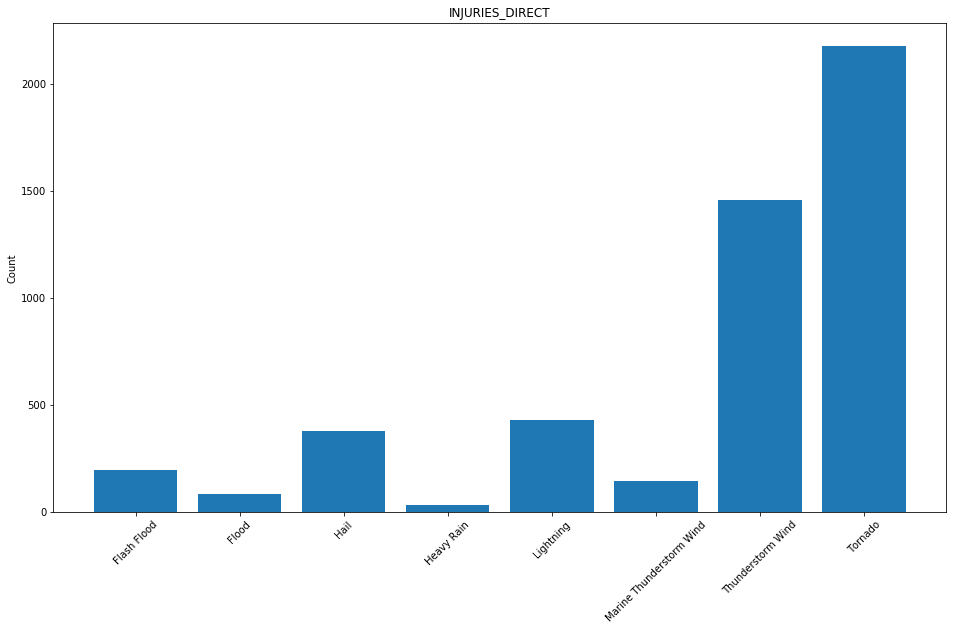

In [149]:
# injuries by severe weather type
fig=plt.figure(figsize=(16, 9))
plt.bar(temp.index, temp["INJURIES_DIRECT"])
plt.title("INJURIES_DIRECT")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

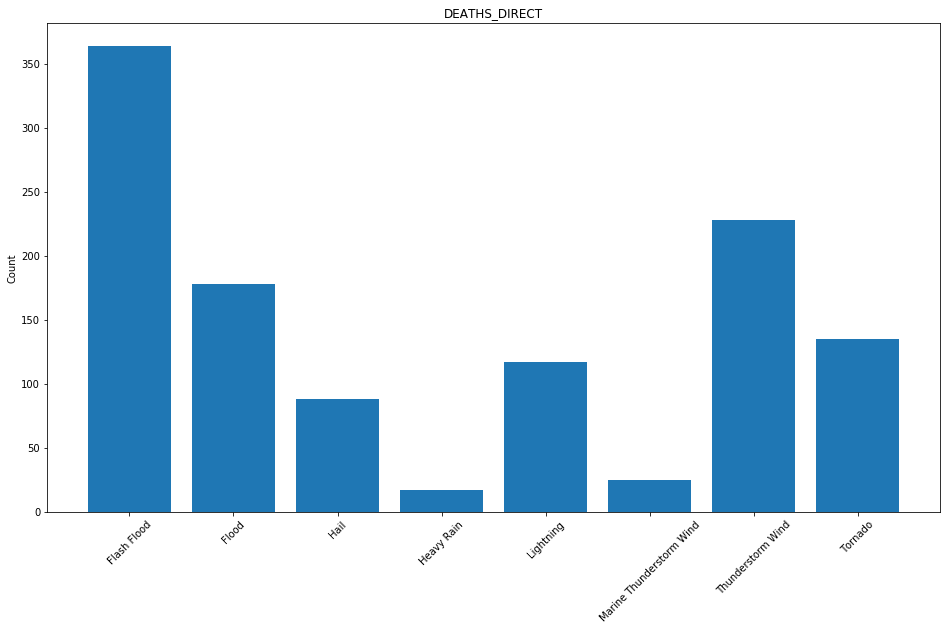

In [150]:
# deaths by severe weather type  
fig=plt.figure(figsize=(16, 9))
plt.bar(temp.index, temp["DEATHS_DIRECT"])
plt.title("DEATHS_DIRECT")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [49]:
# mean damage by event
damage = dat[["EVENT_TYPE","DAMAGE_PROPERTY", "DAMAGE_CROPS"]]
damage.groupby(["EVENT_TYPE"]).mean()

,DAMAGE_PROPERTY,DAMAGE_CROPS
EVENT_TYPE,,
Flash Flood,7.407202e+06,52728.556282
Flood,1.389546e+06,386338.836492
Hail,6.358729e+05,30338.643546
Heavy Rain,2.324100e+05,11363.884007
Lightning,9.155091e+04,670.944964
Marine Thunderstorm Wind,2.993476e+04,8.194686
Thunderstorm Wind,2.892067e+05,8239.840228
Tornado,1.551772e+06,22768.312655


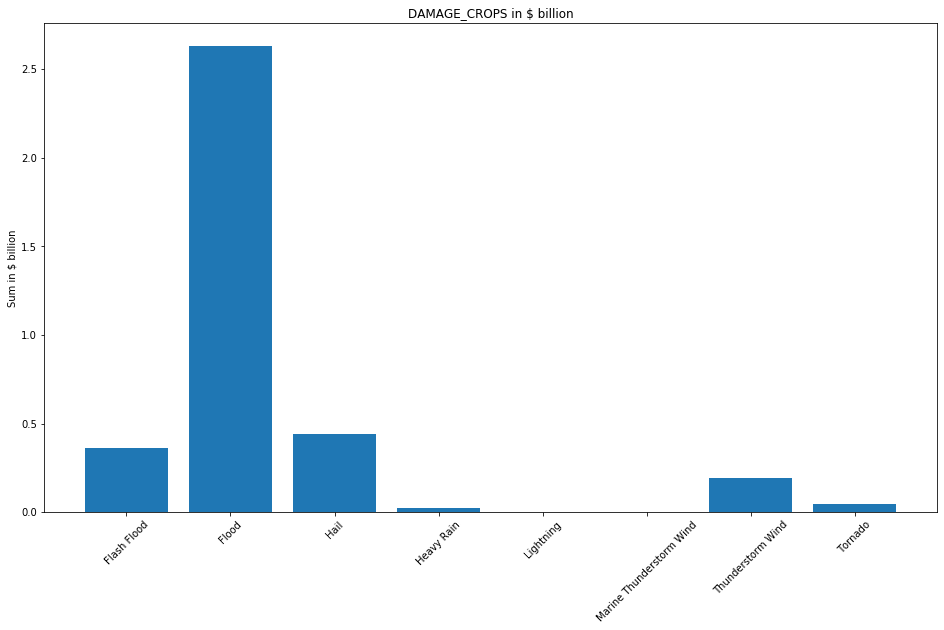

In [151]:
# crop damage
fig=plt.figure(figsize=(16, 9))
plt.bar(temp.index, temp["DAMAGE_CROPS"]/1000000000)
plt.title("DAMAGE_CROPS in $ billion")
plt.ylabel("Sum in $ billion")
plt.xticks(rotation=45)
plt.show()

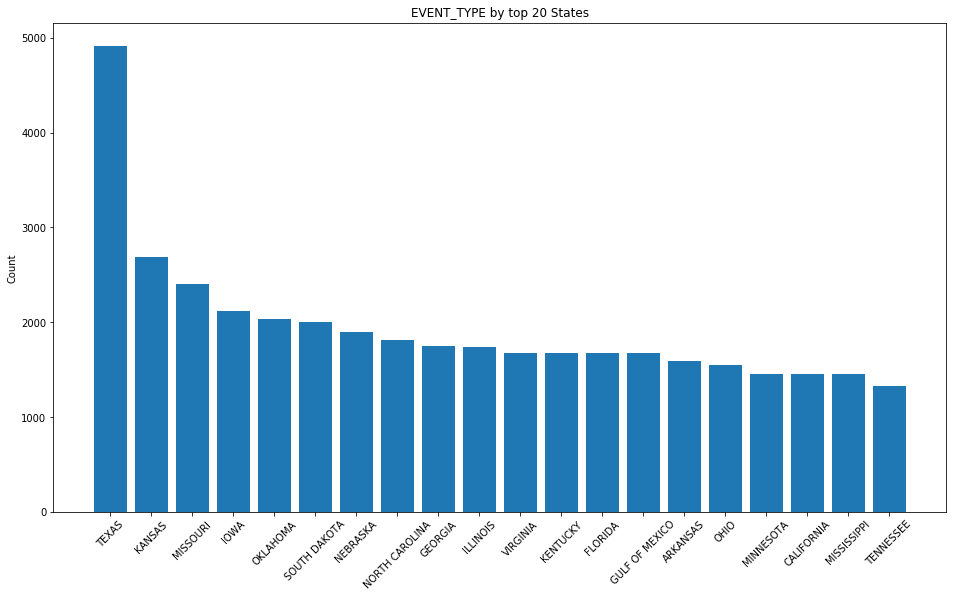

In [152]:
# aggregation on state level
temp2 = dat[["EVENT_TYPE", "STATE"]].groupby("STATE").count()
temp2.sort_values(by="EVENT_TYPE", ascending=False, inplace=True)
top_20_states = temp2.iloc[:20,:]

# plot
fig=plt.figure(figsize=(16, 9))
plt.bar(top_20_states.index, top_20_states["EVENT_TYPE"])
plt.title("EVENT_TYPE by top 20 States")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

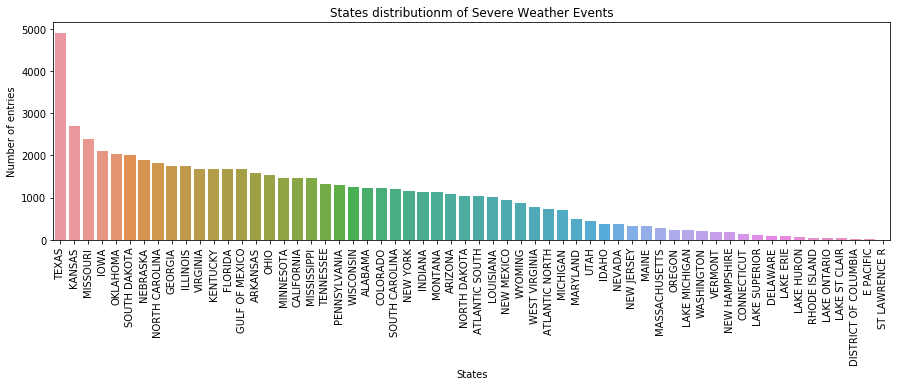

In [158]:
#all data by state
plt.figure(figsize=(15,4))
sns.barplot(dat.STATE.value_counts().index, dat.STATE.value_counts().values)
plt.title("States distributionm of Severe Weather Events")
plt.xlabel("States")
plt.ylabel("Number of entries")
plt.xticks(rotation=90)
plt.show()

# 4. Exploring Weather variables

In [57]:
#copy df
events = dat.copy()

In [59]:
#Defining columns for each severe weather types
events['is_flood'] = events["EVENT_TYPE"].apply(lambda x: 1 if (x == "Flash Flood" or x == "Flood") else 0)
events['hail'] = events["EVENT_TYPE"].apply(lambda x: 1 if x == "Hail" else 0)
events['heavy_rain'] = events["EVENT_TYPE"].apply(lambda x: 1 if x == "Heavy Rain" else 0)
events['lightning'] = events["EVENT_TYPE"].apply(lambda x: 1 if x == "Lightning" else 0)
events['marine_wind'] = events["EVENT_TYPE"].apply(lambda x: 1 if x == "Marine Thunderstorm Wind" else 0)
events['wind'] = events["EVENT_TYPE"].apply(lambda x: 1 if x == "Thunderstorm Wind" else 0)
events['tornado'] = events["EVENT_TYPE"].apply(lambda x: 1 if x == "Tornado" else 0)

In [61]:
#printing head of newly created events dataframe
events.head()

,event_id,latitude,longitude,date,STATE,EVENT_TYPE,TOR_F_SCALE,target,d,cc,...,DAMAGE_CROPS,err_lon,err_lat,is_flood,hail,heavy_rain,lightning,marine_wind,wind,tornado
0,1,24.74,-123.939999,2015-01-02,NaN,NaN,NaN,0,-0.000013,0.0,...,0.0,NaN,NaN,0,0,0,0,0,0,0
1,2,24.74,-123.099999,2015-01-02,NaN,NaN,NaN,0,0.000003,0.0,...,0.0,NaN,NaN,0,0,0,0,0,0,0
2,3,24.74,-122.259999,2015-01-02,NaN,NaN,NaN,0,0.000005,0.0,...,0.0,NaN,NaN,0,0,0,0,0,0,0
3,4,24.74,-121.419999,2015-01-02,NaN,NaN,NaN,0,0.000002,0.0,...,0.0,NaN,NaN,0,0,0,0,0,0,0
4,5,24.74,-120.579999,2015-01-02,NaN,NaN,NaN,0,-0.000004,0.0,...,0.0,NaN,NaN,0,0,0,0,0,0,0


In [62]:
#defining weather related columns
weather =  events[['d','cc','z','o3','pv','r','ciwc','clwc','q','crwc','cswc','t','u','v','w','vo']]
#defining event_type related columns
event_type = events[['hail', 'heavy_rain', 'lightning', 'marine_wind', 'wind', 'tornado']]

In [63]:
weather_names = ['d','cc','z','o3','pv','r','ciwc','clwc','q','crwc','cswc','t','u','v','w','vo']

In [66]:
#scaling weather metrics
std_scaler = StandardScaler()
weather_scaled = std_scaler.fit_transform(weather)

weather_scaled = pd.DataFrame(weather_scaled, columns = ['d','cc','z','o3','pv','r','ciwc',
                                                         'clwc','q','crwc','cswc','t','u','v','w','vo'])

In [68]:
#pasting targets back into weather_scaled
weather_scaled["target"] = events["target"]
weather_scaled[['hail', 'heavy_rain', 'lightning', 
                'marine_wind', 'wind', 'tornado']] = events[['hail', 'heavy_rain', 'lightning', 
                                                             'marine_wind', 'wind', 'tornado']]
weather_scaled["event_type"] = events["EVENT_TYPE"]



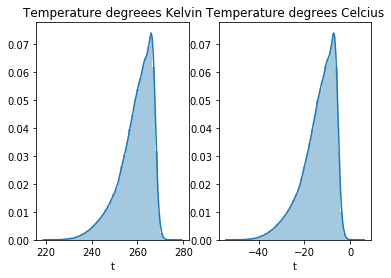

In [76]:
#Kelvin and Celcius temperature
f, (ax1, ax2) = plt.subplots(1,2)
sns.distplot(dat['t'], ax=ax1).set_title('Temperature degreees Kelvin')
sns.distplot(dat['t']-273.15,  ax=ax2).set_title('Temperature degrees Celcius')
plt.show()

- Essential note: these temperatures are unusually low because the temperature readings are collected at high elevations in the atmosphere
- Reading at such elevations may be more indicative of future weather patterns than those at ground level

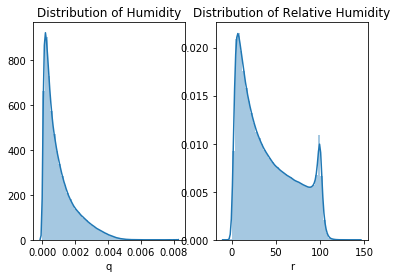

In [78]:
f, (ax1, ax2) = plt.subplots(1,2)
sns.distplot(dat['q'], ax=ax1).set_title('Distribution of Humidity')
sns.distplot(dat['r'], ax=ax2).set_title('Distribution of Relative Humidity')
plt.show()

In [79]:
#proportion of observations with relative hunmidity > 90
len(dat.loc[dat['r']>90,:])/len(dat)

0.10588748916495062

- Relative Humidity variable gives us insight into the proportion of weather observations with relative humidity ~100. 
- This mass of observations is not realized in the humidity variable q

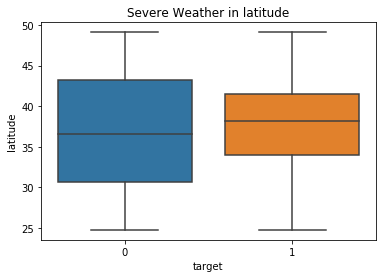

In [145]:
#Severe Weather by latitude
ax = sns.boxplot(x="target", y="latitude", data=dat)
ax.set_title('Severe Weather in latitude')
plt.show()

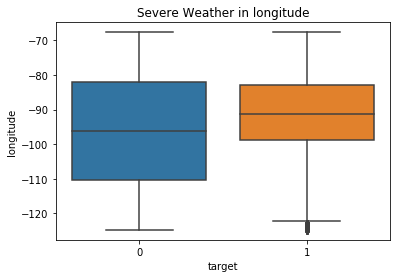

In [147]:
#severe weather by longitude
ax = sns.boxplot(x="target", y="longitude", data=dat)
ax.set_title('Severe Weather in longitude')
plt.show()


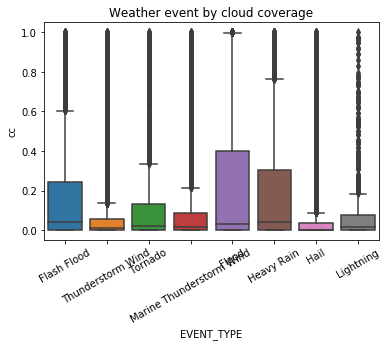

In [100]:
#Weather Event by Cloud coverage
ax = sns.boxplot(x="EVENT_TYPE", y="cc", data=dat)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Weather event by cloud coverage')
plt.show()

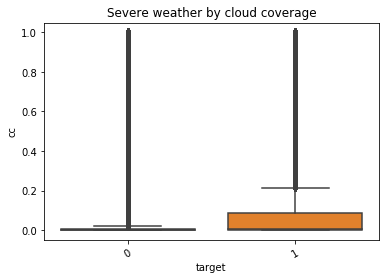

In [101]:
#Weather Event by cloud coverage
ax = sns.boxplot(x="target", y="cc", data=dat)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Severe weather by cloud coverage')
plt.show()

/Users/markroberts/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Log severe weather by cloud coverage')

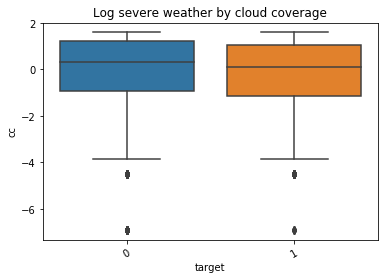

In [102]:
#Weather Event by log cloud coverage after scaling
ax = sns.boxplot(x="target", y=np.log(weather_scaled.cc), data=weather_scaled)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Log severe weather by cloud coverage')


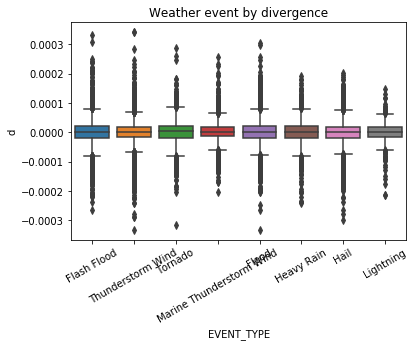

In [103]:
#Weather Event by divergence
ax = sns.boxplot(x="EVENT_TYPE", y="d", data=dat)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Weather event by divergence')
plt.show()

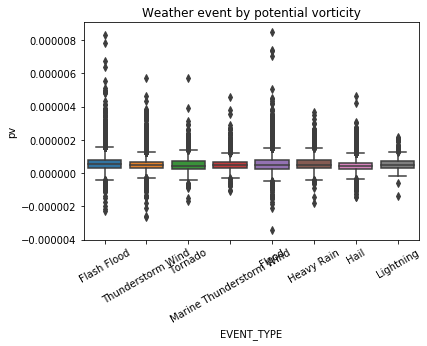

In [104]:
#Weather Event by velocity in one direction
ax = sns.boxplot(x="EVENT_TYPE", y="pv", data=dat)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Weather event by potential vorticity')
plt.show()

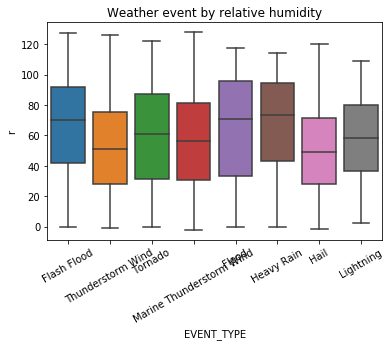

In [105]:
#Weather Event by relative humidity
ax = sns.boxplot(x="EVENT_TYPE", y="r", data=dat)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Weather event by relative humidity')
plt.show()

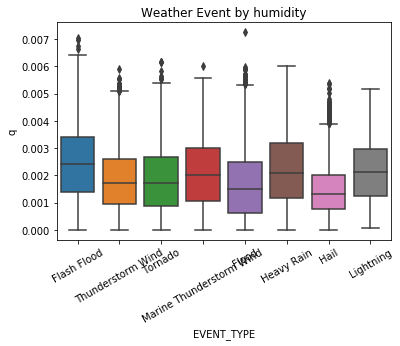

In [108]:
#Weather Event by q (humidity)
ax = sns.boxplot(x="EVENT_TYPE", y="q", data=dat)
ax.set_title("Weather Event by humidity")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

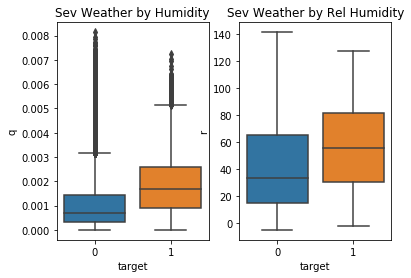

In [124]:
f, (ax1, ax2) = plt.subplots(1,2)
sns.boxplot(x="target", y="q", data=dat, ax=ax1)
ax1.set_title("Sev Weather by Humidity")
sns.boxplot(x="target", y="r", data=dat, ax=ax2)
ax2.set_title("Sev Weather by Rel Humidity")
plt.show()


# 5. Correlation

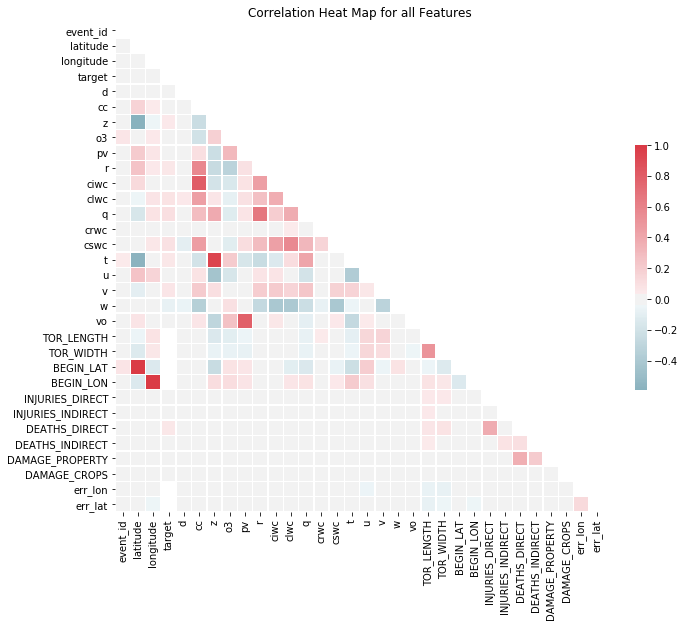

In [140]:
#correlation for all features
corr1 = dat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr1, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Correlation Heat Map for all Features')
plt.show()

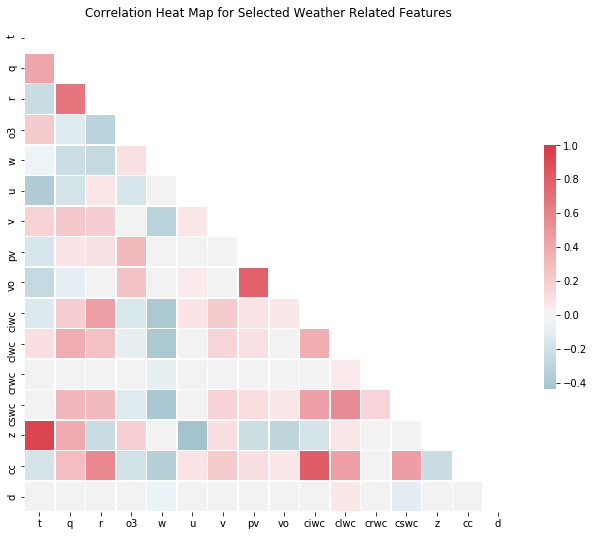

In [142]:
#correlation for only weather-related features
corr2 = dat.loc[:,('t','q','r','o3','w','u','v','pv','vo','ciwc','clwc','crwc','cswc','z','cc','d')].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr2, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Correlation Heat Map for Selected Weather Related Features')
plt.show()

In [143]:
#extracting highest correlations
corr_matrix = weather.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of sol series is the pair with the largest correlation
sol

z     t       0.936526
cc    ciwc    0.804873
pv    vo      0.789296
r     q       0.668667
cc    r       0.577546
                ...   
ciwc  crwc    0.002936
z     crwc    0.001260
d     o3      0.001117
      t       0.000540
      cc      0.000466
Length: 120, dtype: float64

## Feature engineering ideas & next steps
- Make event_id index
- Drop unneccessary "features" (target, STATE, TOR_F_SCALE, TOR_LENGTH, TOR_WIDTH, BEGIN_LAT, BEGIN_LON)
- Standardize features
- Drop features with low variance (VarainceThreshold())
- Drop highly correlated features i.e. z & t, cc & ciwc, pv & vo; drop the one we dont understande
- Time aggregation: For each feature create columns for (see https://github.com/esowc/ml_flood/blob/master/notebooks/2_preprocessing/2.02_feature_engineering_in_time.ipynb)
    * Value the last day
    * Mean over last 10 days
    * Variance over last 10 days
    * Max & min values over last 10 days
- Spacial aggregation: For each feature create columns for (see https://github.com/esowc/ml_flood/blob/master/notebooks/2_preprocessing/2.03_feature_engineering_in_space.ipynb)
    * Mean of values in a radius of 100 miles
    * Variance of values in a radius of 100 miles
    * Max & min value in a radius of 100 miles
- Create regions using lat/longs
- Create month and drop date
- Slice into X and y arrays